In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

# Data Analysis

In [26]:
white = pd.read_csv('winequality-white.csv', delimiter=';')
red = pd.read_csv('winequality-red.csv', delimiter=';')

In [27]:
print('White wines')
print(white.head())
print('Red wines')
print(red.head())

White wines
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10

In [28]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Heatmaps
Use sb.heatmap from seaborn to easily create heatmaps

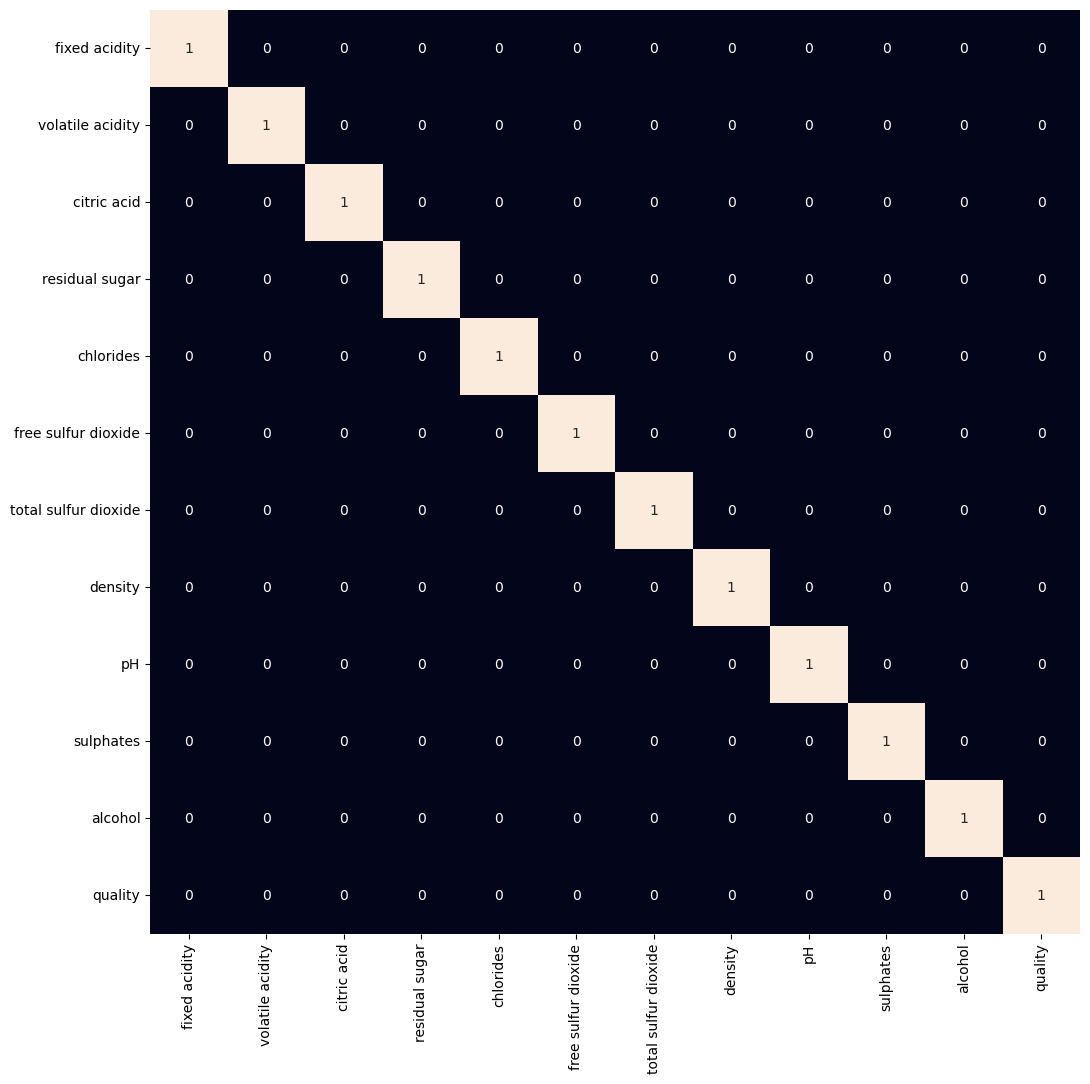

In [30]:
plt.figure(figsize=(12, 12))
sb.heatmap(red.corr() > 0.7, annot=True, cbar=False)
plt.show()

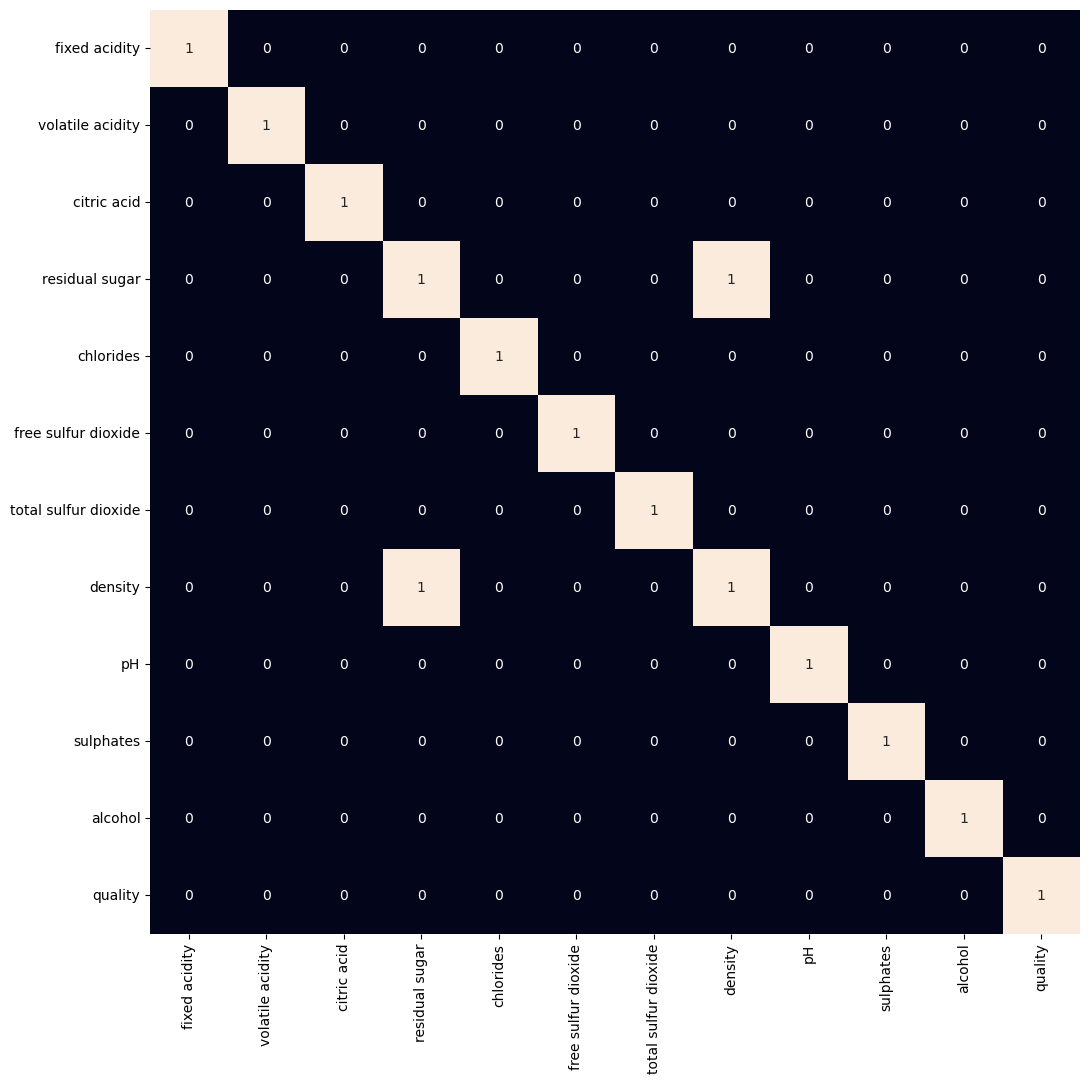

In [31]:
plt.figure(figsize=(12, 12))
sb.heatmap(white.corr() > 0.7, annot=True, cbar=False)
plt.show()

## Histogram
Use pd.hist() to plot histogram easily from dataframe

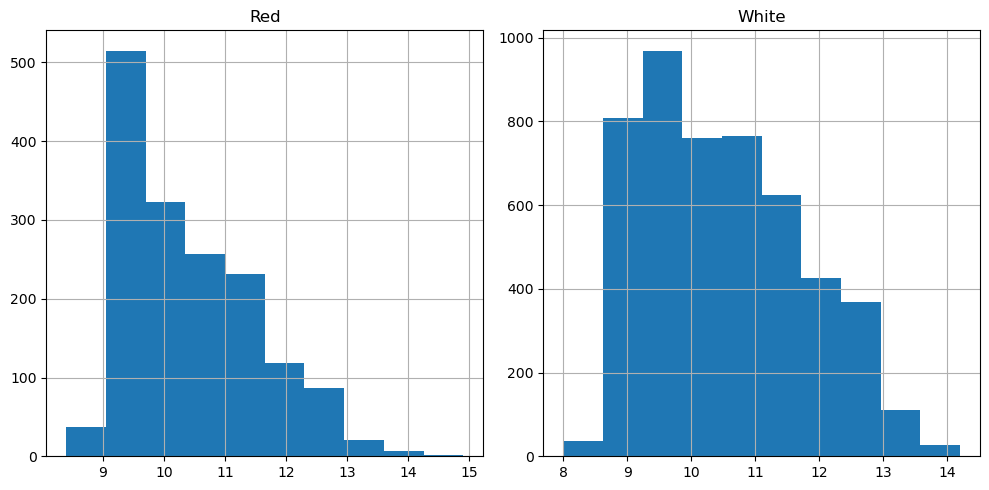

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
red.hist(ax=axes[0],
         column=['alcohol'],
          bins=10)
axes[0].set_title('Red')

white.hist(ax=axes[1],
           column=['alcohol'],
          bins=10)
axes[1].set_title('White')

plt.tight_layout()
plt.show()

# Data Splitting

In [33]:
# Add `type` column to `white` with value zero
red['type'] = 1

# Add `type` column to `white` with value zero
white['type'] = 0

wines = pd.concat([red, white], ignore_index=True)
# combine the two dataframes

In [34]:
wines.shape

(6497, 13)

In [35]:
print(wines.head())
#print(wines.tail())
from sklearn.model_selection import train_test_split

# quality column will not be used
X = wines.iloc[:, 0:11]
y = np.ravel(wines.type)
# ravel() is necessary to have appropriate dimensions

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=45
)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     1  
1      9.8        5     1  
2 

# Model Training and Prediction

In [36]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))

# Add one hidden layer
model.add(Dense(9, activation ='relu'))

# Add an output layer
model.add(Dense(1, activation ='sigmoid'))

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy', 
  optimizer ='adam', metrics =['accuracy'])

c:\Users\fycce\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Training Model
model.fit(X_train, y_train, epochs = 5,
           batch_size = 1, verbose = 1)
 
# Predicting the Value
y_pred = model.predict(X_test)
print(y_pred)

Epoch 1/5
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7769 - loss: 2.2174
Epoch 2/5
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9358 - loss: 0.2323
Epoch 3/5
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9416 - loss: 0.1905
Epoch 4/5
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9539 - loss: 0.1440
Epoch 5/5
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9613 - loss: 0.1218
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[[0.02212687]
 [0.02212687]
 [0.02212687]
 ...
 [0.9907259 ]
 [0.02212687]
 [0.02212687]]


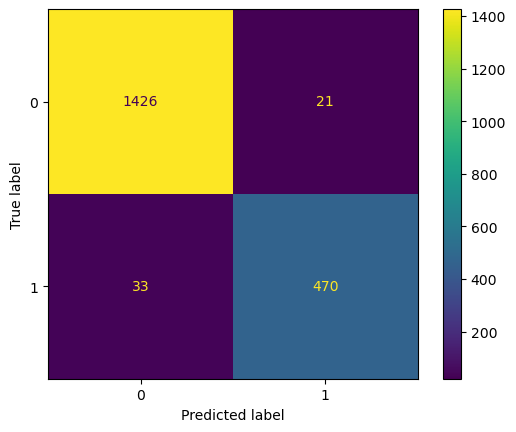

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# turn continuous values into binaries
binary_y_pred = (y_pred >= 0.5).astype(int)
cm = confusion_matrix(y_test, binary_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm) # Assuming your model has a 'classes_' attribute
disp.plot()
plt.show()

AUC ROC:  0.9864242327651231


Text(0, 0.5, 'True Positive Rate')

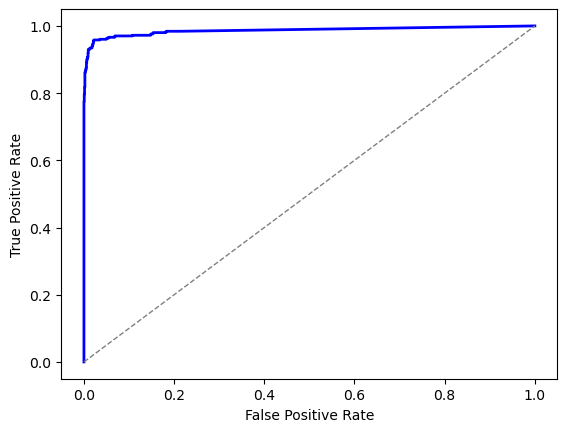

In [ ]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Compute AUC ROC
area = roc_auc_score(y_test, y_pred)
print('AUC ROC: ', area)

# Plot ROC Curve
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [57]:
for i in range(len(X_test)):
    print('Actual: ', y_test[i], ' Predicted: ', binary_y_pred[i])
print(y_test.sum(), binary_y_pred.sum())

Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  0  Predicted:  [0]
Actual:  1  Predicted:  [1]
Actual:  0  Predicte

In [54]:
my_wine = X_test.iloc[1,:]
for i in range(9):
    my_wine = my_wine + X_test.iloc[i + 1, :]
my_wine = my_wine/10
my_wine

fixed acidity             7.590000
volatile acidity          0.425500
citric acid               0.304000
residual sugar            7.475000
chlorides                 0.058000
free sulfur dioxide      31.850000
total sulfur dioxide    123.300000
density                   0.995302
pH                        3.116000
sulphates                 0.464000
alcohol                  10.810000
dtype: float64

In [62]:
my_wine_pred = model.predict(np.array(my_wine))  # why doesn't this work?

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [63]:
my_wine_pred

array([[0.02359282]], dtype=float32)